In [8]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from itertools import cycle

In [705]:
import dendropy
from dendropy.calculate import popgenstat

from Bio import SeqIO
from ete3 import Tree, TreeStyle, faces, AttrFace

In [1]:
import group_by_seg
import baltic as bt

In [102]:
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

# import H5 Numbering

In [828]:
H5_numering_conversion = pd.read_csv('HA5_conversion_table.txt', sep='\t', index_col=0, na_values='-')['H5'].to_dict()

In [829]:
GD96_numering_conversion = {}
for i in range(1, 569):
    if i < 344:
        GD96_numering_conversion[i] = i
    else:
        GD96_numering_conversion[i] = i+1

# t-percentile test for group define

In [95]:
mpd_values = {}

for idx, SEGMENT in enumerate(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']):

    tree_file = './data/03_beast_analysis/beast_db1/combined_%s.mcc.tree' % SEGMENT
    fasta_file = './data/01_sequence_of_dataset1/02_align_unified/db1_seq_by_acc_%s.fasta' % SEGMENT
    tree, pdm = group_by_seg.read_data(tree_file, fasta_file)
    pdc_l, mpd_l = group_by_seg.cal_distribution(tree, pdm)

    # * sensitive analysis
    x_l = []
    res = []
    res2 = []
    for i in np.arange(90, 100.01, 0.05):
        sub_trees, para_group = group_by_seg.extract_subtrees(i, mpd_l, tree, pdm, log2=True)
        m = len(sub_trees)
        l = len(para_group)
        c_l = [len(sub_tree.leaf_nodes()) for sub_tree in sub_trees]
        c_l.extend([1]*l)
        n = sum(c_l)
        c = (1/n)*(sum([c_i*c_i for c_i in c_l]))
        mcs = c / n
        x_l.append(i)
        res.append(mcs)
        res2.append(m+l)
    
    mpd_values[SEGMENT] = (x_l, res, res2)

Percentile threshold: 90.00, Distance threshold: 0.389157, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.05, Distance threshold: 0.389424, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.10, Distance threshold: 0.389510, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.15, Distance threshold: 0.389510, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.20, Distance threshold: 0.389510, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.25, Distance threshold: 0.389510, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile threshold: 90.30, Distance threshold: 0.389757, # of clusters: 38, # of sequences classfied: 432, # of sequnences unclassfied: 23
Percentile th

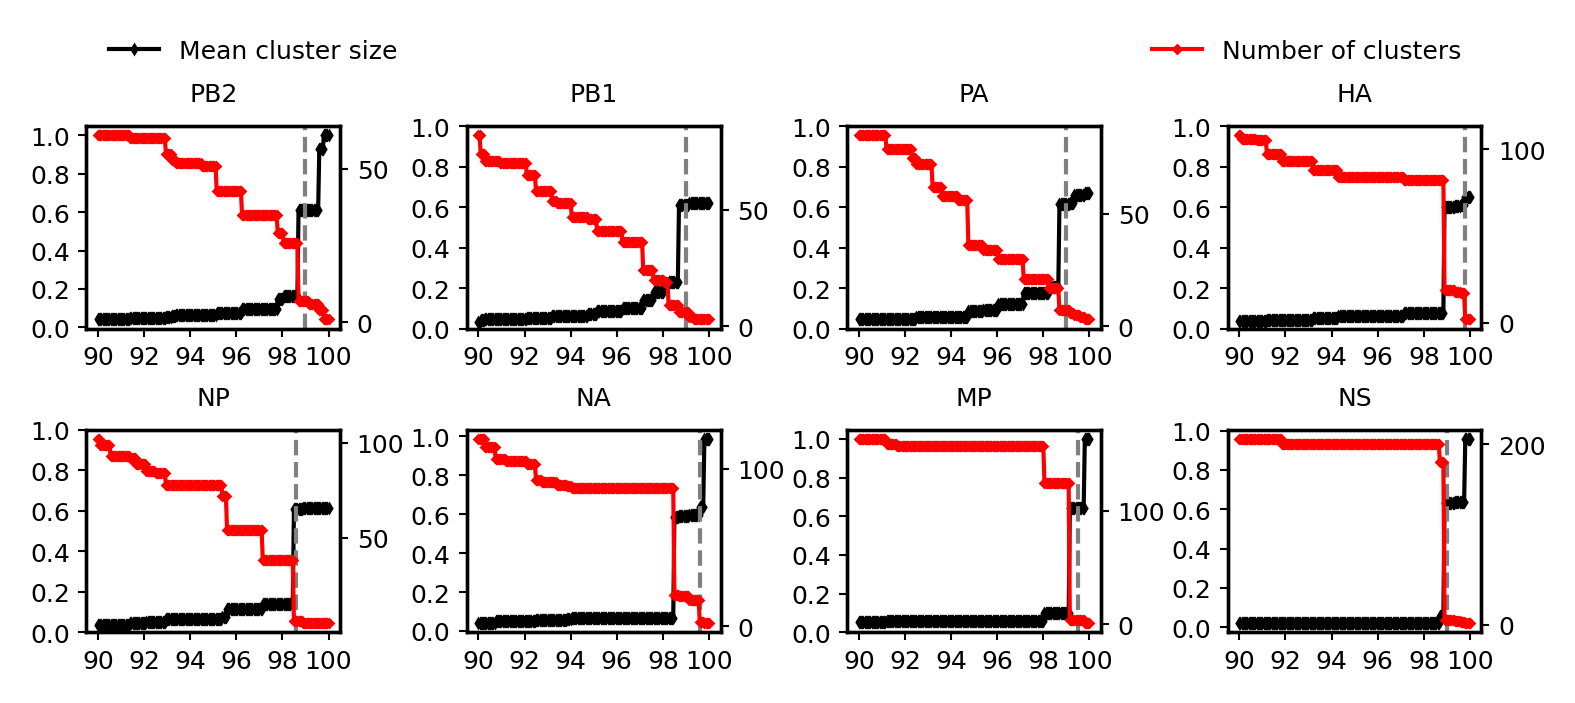

In [464]:
fig = plt.figure(figsize=(6, 2.5), dpi=300)

t_l = [99, 99, 99, 99.8, 98.6, 99.6, 99.5, 99]

for idx, SEGMENT in enumerate(['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']):
    
    x_l, res, res2 = mpd_values[SEGMENT]
    
    ax = fig.add_subplot(2, 4, idx+1)

    plt.plot(x_l, res, 'k-', marker='d', label='Mean cluster size', markersize=1, linewidth=1)
    plt.xticks(ticks=np.arange(90, 101, 2), fontsize=6)
    plt.yticks(ticks=np.arange(0, 1.1, .2), fontsize=6)
    ax.tick_params(length=2, width=.5, pad=2)
    plt.title(SEGMENT, fontdict={'size': 6})
    
    plt.axvline(x=t_l[idx], ymin=0, ymax=1, lw=1, ls='--', color='grey')
    
    if SEGMENT == 'PB2':
        plt.legend(loc='lower left', bbox_to_anchor=(0, 1.2), frameon=False, fontsize=6)

    ax2 = ax.twinx()
    plt.plot(x_l, res2, 'r-', marker='D', label='Number of clusters', markersize=1, linewidth=1)
    plt.yticks(fontsize=6)
    ax2.tick_params(length=2, width=.5, pad=2)
    
    if SEGMENT == 'HA':
        plt.legend(loc='lower right', bbox_to_anchor=(1.01, 1.2), frameon=False, fontsize=6)

plt.subplots_adjust(wspace=.5, hspace=.5, top=.8)

# plt.savefig('./results/Sfig2.pdf')
plt.show()

In [108]:
SEGMENT = 'HA'
i = 99.5

tree_file = './data/03_beast_analysis/beast_db1/combined_%s.mcc.tree' % SEGMENT
fasta_file = './data/01_sequence_of_dataset1/02_align_unified/db1_seq_by_acc_%s.fasta' % SEGMENT
tree, pdm = group_by_seg.read_data(tree_file, fasta_file)
pdc_l, mpd_l = group_by_seg.cal_distribution(tree, pdm)
sub_trees, para_group = group_by_seg.extract_subtrees(i, mpd_l, tree, pdm, log2=True)

Percentile threshold: 99.50, Distance threshold: 1.084254, # of clusters: 5, # of sequences classfied: 442, # of sequnences unclassfied: 13


In [112]:
def tree_visualization(tree, pdm, mpd_l, t, SEGMENT):
    sub_trees, para_group = group_by_seg.extract_subtrees(t, mpd_l, tree, pdm, log1=True)
    nwk = tree.as_string(schema='newick', suppress_rooting=True, suppress_internal_node_labels=False)

    tree_to_visualization = Tree(nwk, format=0, quoted_node_names=True)

    color_list = ['#E64B35', '#4DBBD5', '#00A087', '#F39B7F', '#8491B4', '#7E6148', '#DC0000']
    color_generator = cycle(color_list)

    f = open('group_%s.txt' % SEGMENT, 'w')
    for i, sub_tree in enumerate(sub_trees):
        sub = [t.taxon.label for t in sub_tree.leaf_nodes()]
        node = tree_to_visualization.get_common_ancestor(sub)
        node.img_style['bgcolor'] = next(color_generator)
        for sub_i in sub:
            f.write("%s\t%s\n" % (i, sub_i))
    for para_i in para_group:
        i += 1
        f.write("%s\t%s\n" % (i, para_i.taxon.label))
    f.close()

    ts = TreeStyle()
    ts.scale = 1000

    tree_to_visualization.show(tree_style=ts)
#     tree_to_visualization.render('group_%s.pdf' % SEGMENT, tree_style=ts)




print("********* group results for %s ***********" % SEGMENT)
tree_file = './data/03_beast_analysis/beast_db1/combined_%s.mcc.tree' % SEGMENT
fasta_file = './data/01_sequence_of_dataset1/02_align_unified/db1_seq_by_acc_%s.fasta' % SEGMENT



tree_visualization(tree, pdm, mpd_l, 99.5, SEGMENT)



# tree_visualization(tree, pdm)
# tree_to_visualization.render('test.png', tree_style=ts)


********* group results for HA ***********
Branch support: 1.0000, Median patristic distance: 0.278470, # of sequences 20
Branch support: 0.9932, Median patristic distance: 0.331114, # of sequences 30
Branch support: 1.0000, Median patristic distance: 0.181840, # of sequences 3
Branch support: 1.0000, Median patristic distance: 0.260151, # of sequences 39
Branch support: 0.9883, Median patristic distance: 1.082246, # of sequences 350
Percentile threshold: 99.50, Distance threshold: 1.084254, # of clusters: 5, # of sequences classfied: 442, # of sequnences unclassfied: 13


# selection analysis

In [501]:
from datetime import datetime

AIV_INFO['epi_season'] = pd.to_datetime(AIV_INFO.Collection_Date).apply(lambda x: x.year if x.month < 7 else x.year+1)

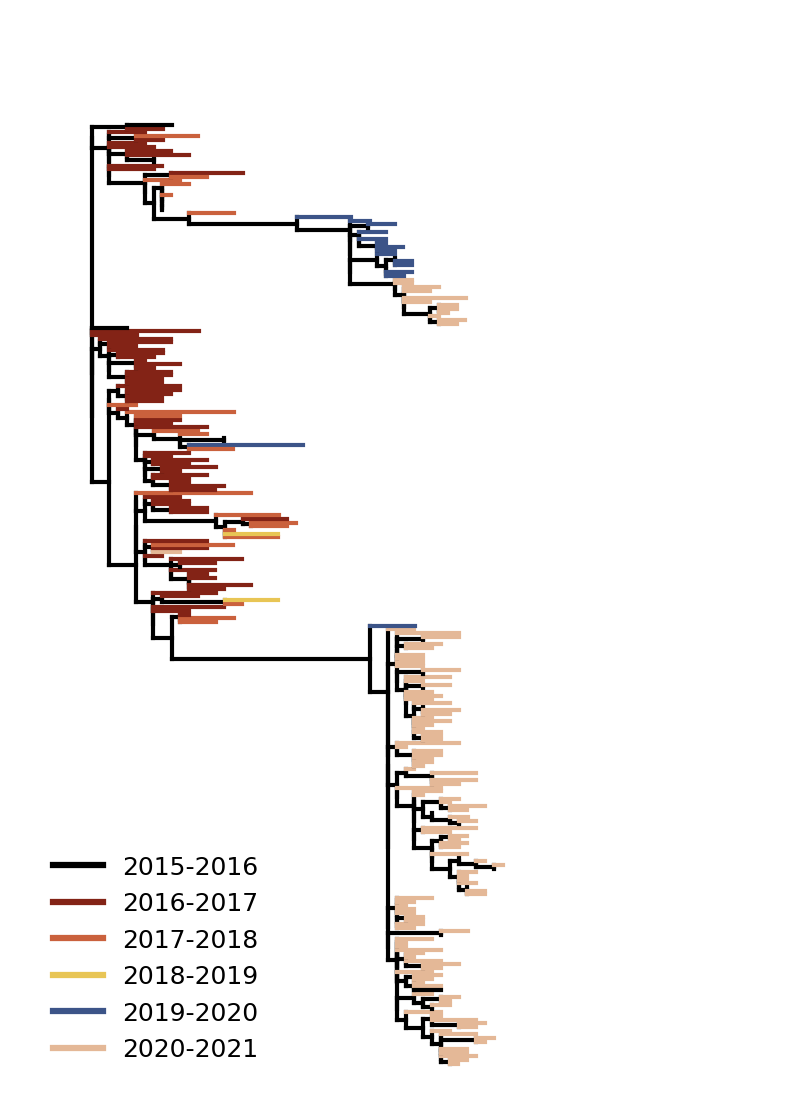

In [504]:
color_seg = ['black', '#832316', '#ca613d', '#e8c555', '#3C5488', '#e4b897', '#a9b8a2', '#729461', '#729461']

year_color = dict(zip(np.arange(2016,2022,1), color_seg))

def color_func(x):
    try:
        year = AIV_INFO.loc[x.name, 'epi_season']
        return year_color[year]
    except:
        return 'black'


ll = bt.loadNewick('./data/selection5/seqs_all.rooted.tree', tip_regex=r'(\(|,)(\'|\")*([^\(\):\[\'\"#]+)(\'|\"|)*(\[)*', variableDate=True, absoluteTime=False, verbose=False)
ll.sortBranches(descending=False)

fig = plt.subplots(figsize=(2.55, 3.6), facecolor='w', dpi=300, constrained_layout=True)

ax = plt.subplot(111)

x_attr = lambda k: k.height / 1.5
ll.plotTree(ax, width=1, colour=color_func, x_attr=x_attr)

ax.set_xlim(-0.1*ll.treeHeight, ll.treeHeight * 1.1)
ax.set_ylim(-5, ll.ySpan * 1.1)

ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks([])
ax.set_xticklabels([])

[ax.spines[loc].set_visible(False) for loc in ax.spines]
# [ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]

import matplotlib.patches as mpatches
from matplotlib.lines import Line2D

handles = []
for k, v in year_color.items():
    handles.append(Line2D([0], [0], color=v, lw=1.5, label=f'{k-1}-{k}', alpha=1))

plt.legend(handles=handles, frameon=False, loc='lower left', fontsize=6, title_fontsize=5, ncol=1)

plt.show()

In [717]:
meme_file = './data/selection5/meme.all.g1.json'
meme_file2 = './data/selection5/meme.all.g0.json'
meme_file3 = './data/selection5/absrel.all.json'
contents = json.load(open(meme_file3))

In [718]:
contents.keys()

dict_keys(['analysis', 'branch attributes', 'data partitions', 'fits', 'input', 'test results', 'tested', 'timers'])

In [719]:
slac_file = './data/selection5/slac.all.json'
contents2 = json.load(open(slac_file))
contents2.keys()

dict_keys(['MLE', 'analysis', 'branch attributes', 'data partitions', 'fits', 'input', 'runtime', 'sample-2.5', 'sample-97.5', 'sample-median', 'tested', 'timers'])

In [720]:
tree_s = contents['input']['trees']['0']
tree_s2 = contents['input']['trees']['0']
# bt.loadNewick()

In [721]:
tree_s[:100] + ' ... ' +  tree_s[-50:]

'(((((((((((((((((((((((((EPI_ISL_1009683:0.001252244,EPI_ISL_1098830:0.0006261600000000006)Node25:0. ... .002511139999999999)Node402:2.500000000418834e-09)'

In [722]:
tree_s2[:100] + ' ... ' +  tree_s2[-50:]

'(((((((((((((((((((((((((EPI_ISL_1009683:0.001252244,EPI_ISL_1098830:0.0006261600000000006)Node25:0. ... .002511139999999999)Node402:2.500000000418834e-09)'

In [723]:
ll = Tree(tree_s + ';', format=1)
ll2 = Tree(tree_s2 + ';', format=1)

In [724]:
ebf = pd.DataFrame(contents['branch attributes']['0']).T
print(ebf.shape)
ebf.head()

(509, 10)


,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name
EPI_ISL_1009683,0.00120121,0,1,0.00120691,0,0.00117675,"[[0, 1]]",1,1,EPI_ISL_1009683
EPI_ISL_1009686,0.00180137,0,1,0.00181038,0,0.00176605,"[[0, 1]]",1,1,EPI_ISL_1009686
EPI_ISL_1009689,0.00180953,0,1,0.0018189,0,0.00176712,"[[0, 1]]",1,1,EPI_ISL_1009689
EPI_ISL_1009690,0.00240556,0,1,0.00241805,0,0.00235457,"[[0, 1]]",1,1,EPI_ISL_1009690
EPI_ISL_1009694,0.00118257,0.463327,1,0.00118718,0,0.00117726,"[[0.4062488049955711, 1]]",1,1,EPI_ISL_1009694


In [725]:
ebf2 = pd.DataFrame(contents2['branch attributes']['0']).T
print(ebf2.shape)
ebf2.head()

(510, 7)


,Global MG94xREV,Nucleotide GTR,amino-acid,codon,nonsynonymous substitution count,original name,synonymous substitution count
EPI_ISL_1009683,0.00119069,0.00117677,"[[M, E, N, I, V, L, L, L, A, I, V, S, L, V, K,...","[[ATG, GAG, AAC, ATA, GTA, CTT, CTT, CTT, GCA,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",EPI_ISL_1009683,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
EPI_ISL_1009686,0.00178559,0.00176473,"[[M, E, N, I, V, L, L, L, A, I, V, S, L, V, K,...","[[ATG, GAG, AAC, ATA, GTA, CTT, CTT, CTT, GCA,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",EPI_ISL_1009686,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
EPI_ISL_1009689,0.00178966,0.00176875,"[[M, E, N, I, V, L, L, L, A, I, V, S, L, V, K,...","[[ATG, GAG, AAC, ATA, GTA, CTT, CTT, CTT, GCA,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",EPI_ISL_1009689,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
EPI_ISL_1009690,0.00238342,0.00235557,"[[M, E, N, I, V, L, L, L, A, I, V, S, L, V, K,...","[[ATG, GAG, AAC, ATA, GTA, CTT, CTT, CTT, GCA,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",EPI_ISL_1009690,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
EPI_ISL_1009694,0.00119101,0.00117709,"[[M, E, N, I, V, L, L, L, A, I, V, S, L, V, K,...","[[ATG, GAG, AAC, ATA, GTA, CTT, CTT, CTT, GCA,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",EPI_ISL_1009694,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."


In [727]:
ebf[(ebf['Baseline MG94xREV omega ratio'] < 10) & (ebf['Baseline MG94xREV omega ratio'] > 0)]

,Baseline MG94xREV,Baseline MG94xREV omega ratio,Corrected P-value,Full adaptive model,LRT,Nucleotide GTR,Rate Distributions,Rate classes,Uncorrected P-value,original name
EPI_ISL_1009694,0.00118257,0.463327,1,0.00118718,0,0.00117726,"[[0.4062488049955711, 1]]",1,1,EPI_ISL_1009694
EPI_ISL_1009707,0.00299004,0.115499,1,0.00300301,0,0.0029458,"[[0.1015346048911131, 1]]",1,1,EPI_ISL_1009707
EPI_ISL_1033028,0.00239019,0.153505,1,0.00239835,0,0.00235446,"[[0.134911134854147, 1]]",1,1,EPI_ISL_1033028
EPI_ISL_1063533,0.0041512,0.621186,1,0.00415833,0,0.00413387,"[[0.546492847454791, 1]]",1,1,EPI_ISL_1063533
EPI_ISL_1080480,0.00118207,0.465738,1,0.00118537,0,0.00117718,"[[0.409383750529045, 1]]",1,1,EPI_ISL_1080480
...,...,...,...,...,...,...,...,...,...,...
Node89,0,1,1,0,0,0,"[[1, 1]]",1,1,NaN
Node9,0.0136617,0.0985674,1,0.0137242,0,0.0131665,"[[0.08654590252571218, 1]]",1,1,NaN
Node90,0,1,1,0,0,0,"[[1, 1]]",1,1,NaN
Node96,0,1,1,0,0,0,"[[1, 1]]",1,1,NaN


In [728]:
ebf['Baseline MG94xREV omega ratio'].apply(lambda x: np.log10(x))

EPI_ISL_1009683        -inf
EPI_ISL_1009686        -inf
EPI_ISL_1009689        -inf
EPI_ISL_1009690        -inf
EPI_ISL_1009694   -0.334112
                     ...   
Node9             -1.006267
Node90             0.000000
Node93                 -inf
Node96             0.000000
Node97             0.000000
Name: Baseline MG94xREV omega ratio, Length: 509, dtype: float64

In [729]:
# for node in ll2.iter_descendants("postorder"):
#     node_name = node.name
#     omega = ebf.loc[node_name, 'Baseline MG94xREV omega ratio']
#     omega = omega if omega < 10 else 10
#     node.add_features(omega=omega)

In [792]:
import matplotlib as mpl
from matplotlib import cm
from matplotlib.colors import to_hex

ns_cmap = cm.get_cmap('Blues', 8)
ps_cmap = cm.get_cmap('Reds', 8)

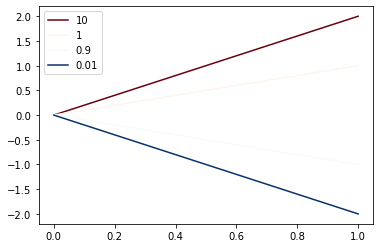

In [793]:
plt.plot([0,2], color=ps_cmap(np.log10(10)), label='10')
plt.plot([0,1], color=ps_cmap(np.log10(1)), label='1')


plt.plot([0,-1], color=ns_cmap(-np.log10(0.9)), label='0.9')
plt.plot([0,-2], color=ns_cmap(-np.log10(0.01)), label='0.01')

plt.legend()

In [812]:
H5_numering_conversion

{'1': '-',
 '2': '-',
 '3': '-',
 '4': '-',
 '5': '-',
 '6': '-',
 '7': '-',
 '8': '-',
 '9': '-',
 '10': '-',
 '11': '-',
 '12': '-',
 '13': '-',
 '14': '-',
 '15': '-',
 '16': '-',
 '-': '-',
 '17': '1',
 '18': '2',
 '19': '3',
 '20': '4',
 '21': '5',
 '22': '6',
 '23': '7',
 '24': '8',
 '25': '9',
 '26': '10',
 '27': '11',
 '28': '12',
 '29': '13',
 '30': '14',
 '31': '15',
 '32': '16',
 '33': '17',
 '34': '18',
 '35': '19',
 '36': '20',
 '37': '21',
 '38': '22',
 '39': '23',
 '40': '24',
 '41': '25',
 '42': '26',
 '43': '27',
 '44': '28',
 '45': '29',
 '46': '30',
 '47': '31',
 '48': '32',
 '49': '33',
 '50': '34',
 '51': '35',
 '52': '36',
 '53': '37',
 '54': '38',
 '55': '39',
 '56': '40',
 '57': '41',
 '58': '42',
 '59': '43',
 '60': '44',
 '61': '45',
 '62': '46',
 '63': '47',
 '64': '48',
 '65': '49',
 '66': '50',
 '67': '51',
 '68': '52',
 '69': '53',
 '70': '54',
 '71': '55',
 '72': '56',
 '73': '57',
 '74': '58',
 '75': '59',
 '76': '60',
 '77': '61',
 '78': '62',
 '79': '6

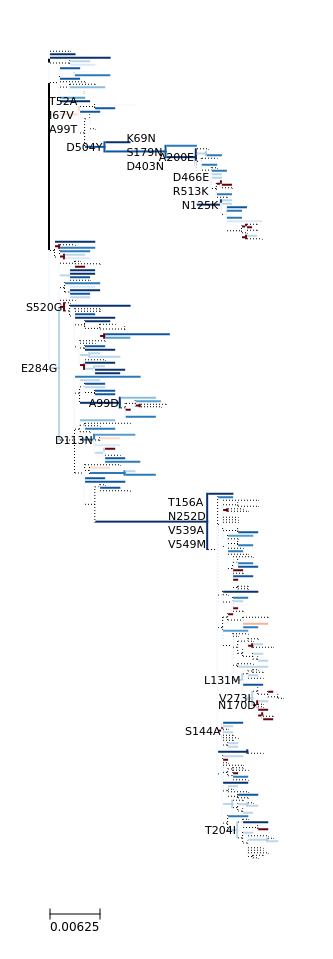

In [847]:
ll2 = Tree(tree_s2 + ';', format=1)

for node in ll2.iter_descendants('postorder'):
    node_name = node.name
    omega = ebf.loc[node_name, 'Baseline MG94xREV omega ratio']
    omega = omega if omega < 10 else 10
    node.add_features(omega=omega)
    
    p_node = node.up
    if p_node.is_root():
        continue

    seq1 = ebf2.loc[node.name, 'amino-acid'][0]
    seq2 = ebf2.loc[p_node.name, 'amino-acid'][0]
    muts = [(node.name, GD96_numering_conversion[idx+1], i, j) for idx, (i, j) in enumerate(zip(seq2, seq1)) if (i != j) and (i) and (j)]
#     muts = [(node.name, H5_numering_conversion[idx+1], i, j) for idx, (i, j) in enumerate(zip(seq2, seq1)) if (i != j) and (i) and (j)]
    if muts:
        m = '\n'.join([f'{aa1}{idx:.0f}{aa2}' for name, idx, aa1, aa2 in muts])
        node.add_features(muts=m)


def layout(node):
    node.img_style['size'] = 0
    node.img_style['vt_line_width'] = 2
    node.img_style['hz_line_width'] = 2
    
    if 'omega' in node.features:
        omega = node.omega
        if omega == 0:
            node.img_style['vt_line_color'] = 'black'
            node.img_style['hz_line_color'] = 'black'
            node.img_style['vt_line_width'] = 1
            node.img_style['hz_line_width'] = 1
            node.img_style['vt_line_type'] = 2
            node.img_style['hz_line_type'] = 2
        elif omega > 1:
            node.img_style['vt_line_color'] = to_hex(ps_cmap(np.log10(omega)))
            node.img_style['hz_line_color'] = to_hex(ps_cmap(np.log10(omega)))
        else:
            node.img_style['vt_line_color'] = to_hex(ns_cmap(-np.log10(omega)))
            node.img_style['hz_line_color'] = to_hex(ns_cmap(-np.log10(omega)))     
        
    if ('muts' in node.features) and (len(node) > 5):
#         node.add_face(AttrFace('muts', fsize=8), 0, 'branch-right')
        node.add_face(AttrFace('muts', fsize=8), 0, 'float')


ts = TreeStyle()

ts.show_leaf_name = False
ts.scale = 8000
ts.branch_vertical_margin = 1.5 # 10 pixels between adjacent branches
ts.allow_face_overlap = True

ts.margin_left=50
ts.margin_right=50
ts.margin_top=50
ts.margin_bottom=50

ll2.ladderize(0)

# ll2.show(tree_style=ts, layout=layout)
# ll2.render("test_fig5a.pdf", tree_style=ts, layout=layout, units='in', w=2.3, dpi=300)
ll2.render("%%inline", tree_style=ts, layout=layout)

In [846]:
print(f'Positive selection sites on the G0 lineage: {GD96_numering_conversion[557]:.0f}')
print(f'Positive selection sites on the G1 lineage: {GD96_numering_conversion[211]:.0f}, {GD96_numering_conversion[341]:.0f}')

print(f'Positive selection sites on the G0 lineage: {H5_numering_conversion[557]:.0f}')
print(f'Positive selection sites on the G1 lineage: {H5_numering_conversion[211]:.0f}, {H5_numering_conversion[341]:.0f}')

Positive selection sites on the G0 lineage: 558
Positive selection sites on the G1 lineage: 211, 341
Positive selection sites on the G0 lineage: 542
Positive selection sites on the G1 lineage: 195, 325


# vis align sequences

In [150]:
records = SeqIO.to_dict((SeqIO.parse('./data/01_sequence_of_dataset1/02_align_unified/db1_seq_by_acc_HA.fasta', 'fasta')), key_function=lambda x: x.id.split('|')[0])

In [151]:
records['EPI_ISL_644735']

SeqRecord(seq=Seq('-------------------------caatagttagccttgttaaaagtgatcag...taa'), id='EPI_ISL_644735|2020-11-04', name='EPI_ISL_644735|2020-11-04', description='EPI_ISL_644735|2020-11-04', dbxrefs=[])

In [152]:
acc_l = ['EPI_ISL_977582', 'EPI_ISL_1697196', 'EPI_ISL_2111625', 'EPI_ISL_3102060', 'EPI_ISL_3128534', 'EPI_ISL_644735', 'EPI_ISL_1123263', 'EPI_ISL_1123350', 'EPI_ISL_1009685', 'EPI_ISL_1697195']
records_i = [records[acc] for acc in acc_l]

In [154]:
records_i

[SeqRecord(seq=Seq('atggagaacatagtacttcttcttgcaatagttagccttgtcaaaagtgatcag...---'), id='EPI_ISL_977582|2020-12-29', name='EPI_ISL_977582|2020-12-29', description='EPI_ISL_977582|2020-12-29', dbxrefs=[]),
 SeqRecord(seq=Seq('atggagaacatagtacttcttcttgcaatagttagccttgttaaaagtgatcag...taa'), id='EPI_ISL_1697196|2021-03-19', name='EPI_ISL_1697196|2021-03-19', description='EPI_ISL_1697196|2021-03-19', dbxrefs=[]),
 SeqRecord(seq=Seq('atggagaacatagtacttcttcttgcaatagttagccttgttaaaagtgatcag...taa'), id='EPI_ISL_2111625|2021-02-15', name='EPI_ISL_2111625|2021-02-15', description='EPI_ISL_2111625|2021-02-15', dbxrefs=[]),
 SeqRecord(seq=Seq('atggagaacatagtacttcttcttgcaatagttagccttgttaaaagtgatcag...taa'), id='EPI_ISL_3102060|2021-03-05', name='EPI_ISL_3102060|2021-03-05', description='EPI_ISL_3102060|2021-03-05', dbxrefs=[]),
 SeqRecord(seq=Seq('atggagaacatagtacttcttcttgcaatagttagccttgttaaaagtgatcag...taa'), id='EPI_ISL_3128534|2021-06-04', name='EPI_ISL_3128534|2021-06-04', description='EPI_ISL_31

In [203]:
start_codon_idx = 337
end_codon_idx = 348

domain1 = [record[337*3: 348*3] for record in records_i]
# domain2 = [record[337*3: 348*3+1] for record in records_i]

In [199]:
import numpy as np, Bio, matplotlib.pyplot as plot
from matplotlib.ticker import FormatStrFormatter
from Bio import SeqIO

font = {'family': 'monospace',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

palette = [
    '#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600',
    '#00DCDC', '#E60A0A', '#EBEBEB', '#8282D2', '#0F820F', 
    '#0F820F', '#145AFF', '#E6E600', '#3232AA', '#DC9682', 
    '#FA9600', '#FA9600', '#B45AB4', '#3232AA', '#0F820F', 
    '#FFFFFF']

aa = 'ARNDCQEGHILKMFPSTWYV-'

palette = ['#C8C8C8', '#145AFF', '#00DCDC', '#E60A0A', '#E6E600']

aa = 'atcg-'

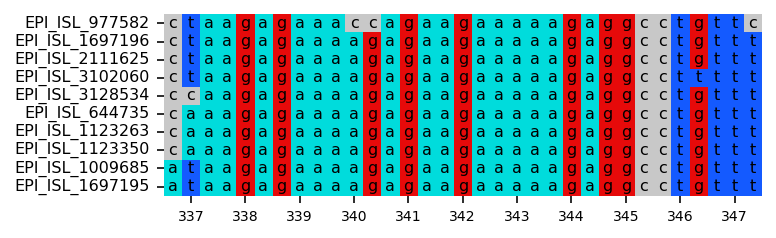

In [237]:
aa_map = mpl.colors.ListedColormap(['#00DCDC', '#145AFF', '#E6E600', '#C8C8C8', '#E60A0A'])


msa = domain1
L = len(msa[0].seq)
N = len(msa)

msa2 = np.zeros((N, L))

for i in range(N):
    for j in range(L):
        msa2[i][j] = aa.index(msa[i].seq[j])

fontsize=8

font_inch = fontsize * 1.5 / 72

figure = plot.figure(figsize=(font_inch * L, font_inch * N), dpi=144)

axes = plt.subplot(111)

axes.imshow(msa2, cmap=aa_map)

# axes.set_xticks(np.arange(msa2.shape[1]))
axes.set_xticks(np.arange(1, msa2.shape[1], 3))
axes.set_xticklabels(np.arange(337, 338+int((msa2.shape[1]-1)/3), 1), fontdict={'fontsize': 7})

# axes.set_yticks(np.arange(msa2.shape[0]))
axes.set_yticks(np.arange(msa2.shape[0]))
axes.set_yticklabels(acc_l, fontdict={'fontsize': 8, 'horizontalalignment': 'right', 'verticalalignment': 'center'})


axes.tick_params(axis='both', which='both', bottom=True, top=False, left=True, right=False)

for i in range(N):
    for j in range(L):
        text = axes.text(j, i, msa[i].seq[j], ha="center", va="center", color="black", fontsize=fontsize)
        
# [axes.spines[loc].set_visible(False) for loc in axes.spines if loc not in ['bottom']]
[axes.spines[loc].set_visible(False) for loc in axes.spines]
# axes.set_axis_off()

plt.show()

In [188]:
msa2.shape[1]

33

In [178]:
np.arange(1, msa2.shape[1]+1, 3)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34])

In [185]:
np.arange(337, 337+int(msa2.shape[1]/3), 1)

array([337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347])

# Parse nextstrain data

In [238]:
dataset1 = pd.read_csv('/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/dataset1_metainfo.csv', sep='\t')
# dataset1

In [239]:
AIV_INFO = pd.read_csv('/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/00_original_data/all_aiv_info.csv', sep='\t', index_col=0)
AIV_INFO.head()

,Isolate_Name,Subtype,Host,Location,Collection_Date,Domestic_Status,year,month,day,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
Isolate_Id,,,,,,,,,,,,,,,,,
EPI_ISL_332439,A/Perigrine falcon/Netherlands/18003274-001/2018,A / H5N6,Falcon,Europe / Netherlands / Westernieland,2018-03-01,NaN,2018,3.0,1.0,EPI1327125,EPI1327126,EPI1327124,EPI1327128,EPI1327121,EPI1327127,EPI1327123,EPI1327122
EPI_ISL_298653,A/peregrine falcon/Israel/1086/2016,A / H5N8,Falco peregrinus,Asia / Israel,2016-12-25,NaN,2016,12.0,25.0,NaN,NaN,NaN,EPI1176530,NaN,NaN,NaN,NaN
EPI_ISL_984690,A/peregrine falcon/Denmark/14596-1/2020,A / H5N8,Falco peregrinus,Europe / Denmark / Region Syddanmark / Svendbo...,2020-11-06,Wild,2020,11.0,6.0,EPI1883026,EPI1883027,EPI1883028,EPI1883029,EPI1883030,EPI1883031,EPI1883032,EPI1883033
EPI_ISL_397115,A/Falco tinnunculus/Tianjin/04/2017,A / H9N2,Falco tinnunculus,Asia / China / Tianjin Municipality,2017-06-15,NaN,2017,6.0,15.0,EPI1618367,EPI1618368,EPI1618369,EPI1618370,EPI1618371,EPI1618372,EPI1618373,EPI1618374
EPI_ISL_295793,A/goose/Vietnam/HU8-1596/2017,A / H5N1,Goose,Asia / Vietnam,2017-08-21,NaN,2017,8.0,21.0,EPI1161283,EPI1161284,EPI1161285,EPI1161286,EPI1161289,EPI1161290,EPI1161291,EPI1161292


In [241]:
df_ns = pd.read_csv('./data/nextstrain/v4/nextstrain_flu_avian_h5nx_ha_metadata.tsv', sep='\t')
df_ns

,strain,date,cleavage_site_sequence,country,furin_cleavage_motif,h5_label_clade,host,originating_lab,region,submitting_lab,subtype,accession
0,A/blackheadedgull/Tyva/41/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,State Research Center Of Virology And Biotechn...,West Asia,Who National Influenza Centre Russian Federation,h5n8,NaN
1,A/greyheron/UvsNuurLake/20/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,Research Institute Of Experimental And Clinica...,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN
2,A/commontern/UvsNuurLake/26/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,Research Institute Of Experimental And Clinica...,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN
3,A/domesticduck/Siberia/50K/2016,2016-10-10,RRKR,Russia,present,2.3.4.4,Avian,NaN,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN
4,A/paintedstork/India/10CA03/2016,2016-10-20,RRKR,India,present,2.3.4.4,Avian,Icar National Institute Of High Security Anima...,South Asia,Icar National Institute Of High Security Anima...,h5n8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
314,A/Gallusgallus/Belgium/11644/2021,2021-09-09,RRKR,Belgium,present,2.3.4.4,Avian,Sciensano Animal Infectious Diseases,Europe,"Sciensano, Department Of Animal Infectious Dis...",h5n8,NaN
315,A/Eagleowl/Estonia/TA212223921VIR1043310/2021,2021-09-19,RRKR,Estonia,present,2.3.4.4,Avian,Estonian Veterinary And Food Laboratory,Europe,Istituto Zooprofilattico Sperimentale Delle Ve...,h5n8,NaN
316,A/chicken/Akita/7C/2021,2021-11-09,RRKR,Japan,present,2.3.4.4,Avian,National Institute Of Animal Health,Japan Korea,National Institute Of Animal Health,h5n8,NaN
317,A/chicken/Kagoshima/B3T/2021,2021-11-14,RRKR,Japan,present,2.3.4.4,Avian,National Institute Of Animal Health,Japan Korea,National Institute Of Animal Health,h5n8,NaN


In [260]:
def prettity(x):
    
    x = x.strip()
    
    forbidden_cha = str.maketrans(
        {' ': None, 
         '(': '_', 
         ')': '_',
         '[': '_',
         ']': '_',
         ':': '_',
         ',': '_',
         ';': '_',
         '\\': '_',
         '-': '_'}
    )
    
    return x.translate(forbidden_cha).replace('_', '')#.lower()
    

In [261]:
df_ns['new_name'] = df_ns.strain.map(prettity).str.strip('H5N8')
df_ns.head()

,strain,date,cleavage_site_sequence,country,furin_cleavage_motif,h5_label_clade,host,originating_lab,region,submitting_lab,subtype,accession,new_name
0,A/blackheadedgull/Tyva/41/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,State Research Center Of Virology And Biotechn...,West Asia,Who National Influenza Centre Russian Federation,h5n8,NaN,A/blackheadedgull/Tyva/41/2016
1,A/greyheron/UvsNuurLake/20/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,Research Institute Of Experimental And Clinica...,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN,A/greyheron/UvsNuurLake/20/2016
2,A/commontern/UvsNuurLake/26/2016,2016-05-25,RRKR,Russia,present,2.3.4.4,Avian,Research Institute Of Experimental And Clinica...,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN,A/commontern/UvsNuurLake/26/2016
3,A/domesticduck/Siberia/50K/2016,2016-10-10,RRKR,Russia,present,2.3.4.4,Avian,NaN,West Asia,Research Institute Of Experimental And Clinica...,h5n8,NaN,A/domesticduck/Siberia/50K/2016
4,A/paintedstork/India/10CA03/2016,2016-10-20,RRKR,India,present,2.3.4.4,Avian,Icar National Institute Of High Security Anima...,South Asia,Icar National Institute Of High Security Anima...,h5n8,NaN,A/paintedstork/India/10CA03/2016


In [262]:
new_name = AIV_INFO.Isolate_Name.map(prettity).str.strip('H5N8')
tmp = AIV_INFO[new_name.isin(df_ns.new_name)]
tmp

,Isolate_Name,Subtype,Host,Location,Collection_Date,Domestic_Status,year,month,day,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
Isolate_Id,,,,,,,,,,,,,,,,,
EPI_ISL_298653,A/peregrine falcon/Israel/1086/2016,A / H5N8,Falco peregrinus,Asia / Israel,2016-12-25,NaN,2016,12.0,25.0,NaN,NaN,NaN,EPI1176530,NaN,NaN,NaN,NaN
EPI_ISL_231685,A/black-headed gull/Tyva/41/2016,A / H5N8,Larus ridibundus,Europe / Russian Federation / Tyva Republic,2016-05-25,NaN,2016,5.0,25.0,EPI823753,EPI823754,EPI823755,EPI823756,EPI823757,EPI823758,EPI823759,EPI823760
EPI_ISL_266537,A/peacock/Belgium/1017/2017,A / H5N8,Pavo cristatus,Europe / Belgium,2017-02-08,NaN,2017,2.0,8.0,EPI1007672,EPI1007673,EPI1007674,EPI1007675,EPI1007676,EPI1007677,EPI1007678,EPI1007679
EPI_ISL_1279262,A/mute swan/Croatia/14/2021,A / H5N8,Cygnus olor,Europe / Croatia / Vukovarsko-Srijemska Zupani...,2021-03-01,Wild,2021,3.0,1.0,EPI1850959,EPI1850960,EPI1850961,EPI1850962,EPI1850963,EPI1850964,EPI1850965,EPI1850966
EPI_ISL_1279936,A/mute swan/Croatia/19/2021,A / H5N8,Cygnus olor,Europe / Croatia / Vukovarsko-Srijemska Zupani...,2021-03-08,Wild,2021,3.0,8.0,NaN,NaN,NaN,EPI1850967,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
EPI_ISL_257701,A/chicken/Czech Republic/2643-17_1/2017 (H5N8),A / H5N8,Gallus gallus,Europe / Czech Republic / Jihocesky Kraj / Okr...,2017-02-22,Domestic,2017,2.0,22.0,NaN,NaN,NaN,EPI969262,NaN,EPI969263,EPI969264,NaN
EPI_ISL_257699,A/Tufted Duck/Switzerland/V237/2016,A / H5N8,Aythya fuligula,Europe / Switzerland / Kanton Bern / Amt Biel ...,2016-11-13,Wild,2016,11.0,13.0,EPI969251,EPI969252,EPI969253,EPI969254,EPI969255,EPI969256,EPI969257,EPI969258
EPI_ISL_3142391,A/mute_swan/Austria/21051907_21VIR3291-7/2021,A / H5N8,Wild bird,Europe / Austria / Oberneukirchen,2021-04-27,NaN,2021,4.0,27.0,EPI1884046,EPI1884047,EPI1884045,EPI1884049,EPI1884042,EPI1884048,EPI1884044,EPI1884043


In [281]:
records = SeqIO.to_dict(SeqIO.parse('/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/00_original_data/gisaid_aiv.fasta', 'fasta'), key_function=lambda x: 'EPI' + x.id.split('|')[0])

In [283]:
records['EPI1815147']

SeqRecord(seq=Seq('agcraaagcaggtcaaatatattcaatatggagagaataaaagaactacgagat...act'), id='1815147||EPI_ISL_683593|A/Eurasian_wigeon/Italy/20VIR7139-121/2020|2020-11-14|PB2', name='1815147||EPI_ISL_683593|A/Eurasian_wigeon/Italy/20VIR7139-121/2020|2020-11-14|PB2', description='1815147||EPI_ISL_683593|A/Eurasian_wigeon/Italy/20VIR7139-121/2020|2020-11-14|PB2', dbxrefs=[])

In [278]:
seg_l = ['PB2', 'PB1', 'PA', 'HA', 'NP', 'NA', 'MP', 'NS']

In [277]:
# records2 = [records.get(k, None) for k in tmp['HA Segment_Id']]
# records2 = [record for record in records2 if record]

# for record in records2:
#     seq, _, isl, *_ = record.id.split('|')
#     record.id = isl
#     record.description = ''

# SeqIO.write(records2, '/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/nextstrain/v4/seq_HA.fasta', 'fasta')

In [293]:
for seg in seg_l:
    
    records2 = [records.get(k, None) for k in tmp[f'{seg} Segment_Id'].dropna().values]
    records2 = [record for record in records2 if record]
#     records3 = []
    
#     for record in records2:
#         try:
#             seq, _, isl, *_ = record.id.split('|')
#             record.id = isl
#             record.description = ''
#             records3.append(record)
#         except ValueError:
#             print(record.id)
            
    SeqIO.write(records2, f'/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/nextstrain/v4/seq_{seg}.fasta', 'fasta')

In [183]:
AIV_INFO.loc[['EPI_ISL_623074', 'EPI_ISL_405278', 'EPI_ISL_684037', 'EPI_ISL_503968', 'EPI_ISL_985200', 'EPI_ISL_623074'], :]

,Isolate_Name,Subtype,Host,Location,Collection_Date,Domestic_Status,year,month,day,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
Isolate_Id,,,,,,,,,,,,,,,,,
EPI_ISL_623074,A/chicken/Iraq/1/2020,A / H5N8,Chicken,Asia / Iraq / Muhafazat Ninawa,2020-05-12,Domestic,2020,5.0,12.0,EPI1811625,EPI1811626,EPI1811627,EPI1811628,EPI1811629,EPI1811630,EPI1811631,EPI1811632
EPI_ISL_405278,A/guinea_fowl/Nigeria/OG-GF11T_19VIR8424-7/201...,A / H5N8,Guineafowl,Africa / Nigeria / Ogun State,2019-07-05,Domestic,2019,7.0,5.0,EPI1666959,EPI1666960,EPI1666961,EPI1666962,EPI1666963,EPI1666964,EPI1666965,EPI1666966
EPI_ISL_684037,A/goose/Tatarstan/1730-2/2020,A / H5N8,Goose,Europe / Russian Federation / Republic of Tata...,2020-10-09,Domestic,2020,10.0,9.0,EPI1815188,EPI1815189,EPI1815190,EPI1815191,EPI1815192,EPI1815193,EPI1815194,EPI1815195
EPI_ISL_503968,A/chicken/Bulgaria/217_20VIR1724-1/2020,A / H5N8,Chicken,Europe / Bulgaria,2020-03-09,NaN,2020,3.0,9.0,EPI1780066,EPI1780068,EPI1780070,EPI1780072,EPI1780074,EPI1780076,EPI1780078,EPI1780080
EPI_ISL_985200,A/duck/Korea/H509/2020,A / H5N8,Avian,"Asia / Korea, Republic of / CB",2020-12-22,NaN,2020,12.0,22.0,EPI1846062,EPI1846063,EPI1846061,EPI1846065,EPI1846058,EPI1846064,EPI1846060,EPI1846059
EPI_ISL_623074,A/chicken/Iraq/1/2020,A / H5N8,Chicken,Asia / Iraq / Muhafazat Ninawa,2020-05-12,Domestic,2020,5.0,12.0,EPI1811625,EPI1811626,EPI1811627,EPI1811628,EPI1811629,EPI1811630,EPI1811631,EPI1811632


In [416]:
AIV_INFO.loc[['EPI_ISL_266821', 'EPI_ISL_292233', 'EPI_ISL_250918', 'EPI_ISL_255934', 'EPI_ISL_300702', 'EPI_ISL_268936', 'EPI_ISL_684037', 'EPI_ISL_503968', 'EPI_ISL_412988', 'EPI_ISL_369342', 'EPI_ISL_387133', 'EPI_ISL_405278'], :]

,Isolate_Name,Subtype,Host,Location,Collection_Date,Domestic_Status,year,month,day,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
Isolate_Id,,,,,,,,,,,,,,,,,
EPI_ISL_266821,A/Bean goose/Hubei/CH-i119/2017,A / H5N8,Anser anser,Asia / China / Hubei Province,2017-02-24,Wild,2017,2.0,24.0,EPI1009501,EPI1009502,EPI1009503,EPI1009504,EPI1009505,EPI1009506,EPI1209000,EPI1009508
EPI_ISL_292233,A/Bar-headed Goose/Qinghai/a91/2016,A / H5N8,Anser indicus,Asia / China / Qinghai Province,2016-05-15,Wild,2016,5.0,15.0,EPI1144390,EPI1144391,EPI1144392,EPI1144393,EPI1144394,EPI1144395,EPI1144396,EPI1144397
EPI_ISL_250918,A/chicken/Czech Republic/1863-17_1/2017 (H5N8),A / H5N8,Gallus gallus,Europe / Czech Republic / Stredocesky Kraj / O...,2017-02-07,Domestic,2017,2.0,7.0,NaN,NaN,NaN,EPI931194,NaN,EPI931195,EPI931196,NaN
EPI_ISL_255934,A/Mute swan/Hungary/6092/2017,A / H5N8,Avian,Europe / Hungary / Komarom-Esztergom,2017-02-15,NaN,2017,2.0,15.0,EPI959528,EPI959529,EPI959527,EPI959531,EPI959524,EPI959530,EPI959526,EPI959525
EPI_ISL_300702,A/chicken/Poland/101/2017,A / H5N8,Chicken,Europe / Poland / Lower Silesian Voivodeship,2017-02-03,Domestic,2017,2.0,3.0,EPI1184635,EPI1184942,EPI1184994,EPI1184995,EPI1184996,EPI1184997,EPI1184998,EPI1184999
EPI_ISL_268936,A/mute swan/Czech Republic/964-17/2017 (H5N8),A / H5N8,Cygnus olor,Europe / Czech Republic / Stredocesky Kraj / O...,2017-01-19,Wild,2017,1.0,19.0,NaN,NaN,NaN,EPI1021093,NaN,EPI1117238,EPI1117249,NaN
EPI_ISL_684037,A/goose/Tatarstan/1730-2/2020,A / H5N8,Goose,Europe / Russian Federation / Republic of Tata...,2020-10-09,Domestic,2020,10.0,9.0,EPI1815188,EPI1815189,EPI1815190,EPI1815191,EPI1815192,EPI1815193,EPI1815194,EPI1815195
EPI_ISL_503968,A/chicken/Bulgaria/217_20VIR1724-1/2020,A / H5N8,Chicken,Europe / Bulgaria,2020-03-09,NaN,2020,3.0,9.0,EPI1780066,EPI1780068,EPI1780070,EPI1780072,EPI1780074,EPI1780076,EPI1780078,EPI1780080
EPI_ISL_412988,A/chicken/Iran/17RS654-15/2017,A / H5N8,Chicken,"Asia / Iran, Islamic Republic of",2017-01-05,NaN,2017,1.0,5.0,EPI1701657,EPI1701658,EPI1701656,EPI1701660,EPI1701653,EPI1701659,EPI1701655,EPI1701654


In [9]:
seq_path = '/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/01_sequence_of_dataset1/02_align_unified/db1_seq_by_acc_HA.fasta'
records = list(SeqIO.parse(seq_path, 'fasta'))

for record in records:
    new_id = record.id.split('|')[0]
    record.id = new_id
    record.description = ''

SeqIO.write(records, '/home/zeng/DulabWork/H5N8_evolution/data_201910_202108/data/allHA.fasta', 'fasta')

455

# blast ha



In [405]:
seq_dir = './data/07_blast_res/blast_res_HA.fasta'
records = list(SeqIO.parse(seq_dir, 'fasta'))

In [406]:
print(len(records))

1460


In [407]:
seq_acc_l = [record.id for record in records]
blast_hits = AIV_INFO[(AIV_INFO['HA Segment_Id'].isin(seq_acc_l)) & (AIV_INFO['year'] < 2020)]
seq_acc_before_2020_s = blast_hits['HA Segment_Id']
seq_acc_before_2020 = seq_acc_before_2020_s.to_list()

In [408]:
seqacc2islacc = {v: k for k, v in seq_acc_before_2020_s.to_dict().items()}

In [409]:
records2 = []
for record in records:
    if record.id in seq_acc_before_2020:
        record.id = seqacc2islacc[record.id]
        record.name = ''
        record.description = ''
        records2.append(record)
# [record for record in records if record.id in seq_acc_before_2020]

In [411]:
SeqIO.write(records2, './data/seqs_before2020.fasta', 'fasta')

863

In [426]:
acc_l = [record.id for record in SeqIO.parse('./data/selection5/prepare_seqs/seqs_before2020.rep.fasta', 'fasta')]

In [430]:
AIV_INFO.loc[acc_l, :].sort_values(['year']).iloc[:50, :]

,Isolate_Name,Subtype,Host,Location,Collection_Date,Domestic_Status,year,month,day,PB2 Segment_Id,PB1 Segment_Id,PA Segment_Id,HA Segment_Id,NP Segment_Id,NA Segment_Id,MP Segment_Id,NS Segment_Id
Isolate_Id,,,,,,,,,,,,,,,,,
EPI_ISL_295492,A/Anser cygnoides/Hubei/FW44/2016,A / H5N8,Anser cygnoides,Asia / China,2016-12-13,NaN,2016,12.0,13.0,EPI1159806,EPI1159807,EPI1159808,EPI1159809,EPI1159810,EPI1159811,EPI1159812,EPI1159813
EPI_ISL_237554,A/painted stork/India/10CA03/2016,A / H5N8,Other avian,Asia / India / Madhya Pradesh / Gwalior,2016-10-20,Wild,2016,10.0,20.0,EPI858841,EPI858842,EPI858843,EPI858844,EPI858845,EPI858846,EPI858847,EPI858848
EPI_ISL_238040,A/tufted duck/Germany-SN/R8795/2016,A / H5N8,Aythya fuligula,Europe / Germany / Saxony,2016-11-11,Wild,2016,11.0,11.0,NaN,NaN,NaN,EPI861222,NaN,EPI861015,NaN,NaN
EPI_ISL_240540,A/chicken/Croatia/103/2016,A / H5N8,Gallus gallus,Europe / Croatia / Viroviticko-Podravska Zupan...,2016-12-27,Domestic,2016,12.0,27.0,NaN,NaN,NaN,EPI873212,NaN,EPI873213,NaN,NaN
EPI_ISL_298650,A/turkey/Israel/1076/2016,A / H5N8,Turkey,Asia / Israel,2016-12-24,NaN,2016,12.0,24.0,NaN,NaN,NaN,EPI1176527,NaN,NaN,NaN,NaN
EPI_ISL_298647,A/cormorant/Israel/1035/2016,A / H5N8,Other avian,Asia / Israel,2016-12-19,NaN,2016,12.0,19.0,NaN,NaN,NaN,EPI1176524,NaN,NaN,NaN,NaN
EPI_ISL_298642,A/chicken/Israel/1048/2016,A / H5N8,Chicken,Asia / Israel,2016-12-20,NaN,2016,12.0,20.0,NaN,NaN,NaN,EPI1176519,NaN,NaN,NaN,NaN
EPI_ISL_378362,A/whooper swan/Shanxi/RC01/2016,A / H5N8,Whooper swan,Asia / China,2016-12-20,NaN,2016,12.0,20.0,EPI1549838,EPI1549839,EPI1549840,EPI1549841,EPI1549842,EPI1549843,EPI1549844,EPI1549845
EPI_ISL_240678,A/domestic duck/Siberia/50K/2016,A / H5N8,Duck,Europe / Russian Federation / Novosibirsk Oblast,2016-10-10,Domestic,2016,10.0,10.0,EPI926600,NaN,EPI926604,EPI926605,EPI926606,EPI926607,EPI926608,EPI926609
